# Support Vector Machine (SVM) Algorithm

Rafiq Islam  
2024-11-05

## Introduction

Support Vector Machines (SVM) is a powerful non-parametric supervised
machine learning algorithm used for classification and, less commonly,
regression tasks. Support Vector Machines are designed to find an
optimal hyperplane that best separates data points into classes. The key
idea behind SVMs is to maximize the margin between data points of
different classes while minimizing classification errors. This leads to
a robust decision boundary that generalizes well to unseen data.

## The Mathematical Foundation of SVM

Consider a classification problem. Given a dataset $(\mathbf{x}_i, y_i)$
where $i = 1, 2, \dots, N$, $x_i\in \mathbb{R}^d$ represents the feature
vector of the $i$-th sample, and $y_i \in \{-1, 1\}$ represents the
class label. The goal of SVM is to find a hyperplane that maximally
separates the classes.

### Hyperplane and Dicision Boundary

Definition (Hyperplane)  
A hyperplane in an $n$-dimensional space is defined by: $$
w^T \mathbf{x} + b = 0
$$

where:

-   $w$ is the weight vector,
-   $b$ is the bias term,
-   $x$ is any point on the hyperplane.

For a two-dimensional space, this hyperplane is simply a line. $$
w^T\mathbf{x}+b=0;\hspace{4mm}\implies w_0x+w_1y+b=0;\hspace{4mm}\implies y=\frac{-w_0x-b}{w_1}
$$

and for a three-dimensional space, this hyperplane is simply a 2D plane

$$
w^T\mathbf{x}+b=0;\hspace{4mm}\implies w_0x+w_1y+w_2z+b=0;\hspace{4mm}\implies z=\frac{-w_0x-w_1y-b}{w_2}
$$

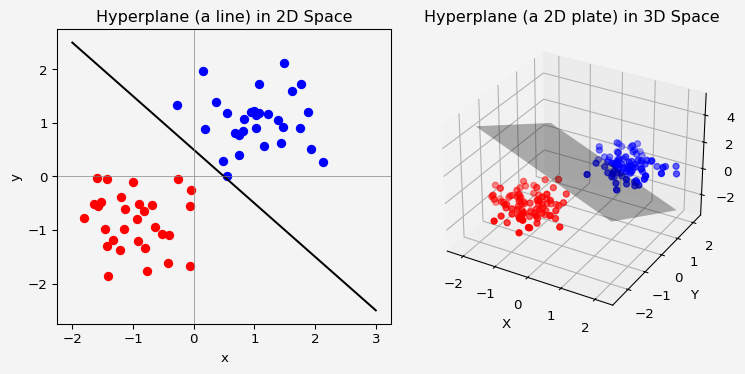

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w_2d = np.array([1,1])
b_2d = -0.5

w_3d = np.array([1,1,1])
b_3d = -1

def decision_boundary_2d(x):
    return (-w_2d[0]*x-b_2d) / w_2d[1]

def decision_boundary_3d(x, y):
    return (-w_3d[0]*x-w_3d[1]*y-b_3d) / w_3d[2]

np.random.seed(0)
class1x_2d = np.random.normal(loc=[1,1],scale=0.5, size=(30,2))
class2x_2d = np.random.normal(loc=[-1,-1],scale=0.5, size=(30,2))

class1x_3d = np.random.normal(loc=[1,1,1],scale=0.5, size=(90,3))
class2x_3d = np.random.normal(loc=[-1,-1,-1],scale=0.5, size=(90,3))

fig = plt.figure( figsize=(7.9,4))
ax1 = fig.add_subplot(121)
x_vals_2d = np.linspace(-2,3,100)
plt.plot(
    x_vals_2d, decision_boundary_2d(x_vals_2d),
    'k-', label = "Decision Boundary (Hyperplane)"
    )
ax1.scatter(
    class1x_2d[:,0], class1x_2d[:,1], color='blue',
    marker='o', label = 'Class +1'
    )
ax1.scatter(
    class2x_2d[:,0], class2x_2d[:,1], color='red',
    marker='o', label = 'Class -1'
    )
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Hyperplane (a line) in 2D Space')
ax1.axhline(0, color='grey', lw = 0.5)
ax1.axvline(0, color='grey', lw = 0.5)


ax2 = fig.add_subplot(122, projection = '3d')
x_vals_3d = np.linspace(-2,2,30)
y_vals_3d = np.linspace(-2,2,30)
X, Y = np.meshgrid(x_vals_3d, y_vals_3d)
Z = decision_boundary_3d(X, Y)

ax2.plot_surface(X, Y, Z, color='k', alpha = 0.3, rstride=100, cstride=100, edgecolor='none')
ax2.scatter(class1x_3d[:,0], class1x_3d[:,1],class1x_3d[:,2], color = 'blue', marker='o', label='Class +1')
ax2.scatter(class2x_3d[:,0], class2x_3d[:,1],class2x_3d[:,2], color = 'red', marker='o', label='Class -1')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Hyperplane (a 2D plate) in 3D Space')

plt.tight_layout()
axes = [ax1,ax2]
for ax in axes:
    ax.set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

### Margin and the Optimal Hyperplane

Definition (Margin)  
The margin is the distance between the hyperplane and the nearest data
points from either class. SVM aims to maximize this margin to achieve
better separation, which makes the classifier more robust.

To define the margin mathematically, we impose that for all points: $$
y_i (w^T \mathbf{x}_i + b) \geq 1 \quad \forall i
$$

For a data vector $\mathbf{x}_i$ with label $y_i$:

-   If $y_i = +1$: we want $w^T \mathbf{x}_i + b\ge 1$ (to be on the
    correct side of the hyperplane)  
-   If $y_i = -1$: we want $w^T \mathbf{x}_i + b\le 1$ (to be on the
    correct side of the hyperplane)

These two conditions combaine the equation mention above. That is all
points must be at least a unit distance from the hyperplane on the
correct side. The data points that satisfy $y_i (w^T x_i + b) = 1$ or
$y_i (w^T x_i + b) = -1$ lie on the “support vectors,” or the points
closest to the hyperplane.

In [2]:
import plotly.io as pio
import plotly.graph_objects as go

A,B,C = 2,-3,5
D1 = 5
D2 = -3

dist = abs(D1-D2)/np.sqrt(A**2+B**2+C**2)
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
x,y = np.meshgrid(x,y)

z1 = (-A*x-B*y - D1)/C
z2 = (-A*x-B*y - D2)/C

fig = go.Figure()

fig.add_trace(go.Surface(z=z1, x=x, y=y, opacity=0.5, colorscale='Blues', name='Plane 1'))
fig.add_trace(go.Surface(z=z2, x=x, y=y, opacity=0.5, colorscale='Blues', name='Plane 2'))

x0,y0 = 0,0
z0 = (-A*x0-B*y0 - D1)/C
z1 = (-A*x0-B*y0 - D2)/C

fig.add_trace(
    go.Scatter3d(x=[x0,x0],y=[y0,y0], z=[z0,z1], mode='lines', line=dict(color='red',width=10),name='Distance')
    )
fig.update_layout(
    scene=dict(
        xaxis_title = 'X',
        yaxis_title = 'Y',
        zaxis_title = 'Z',
        bgcolor = '#f4f4f4'
    ),
    title = "Distance Between two planes",
    width = 600,
    height = 600
)
fig.show()

The margin $M$ can then be expressed as: $$
M = \frac{2}{\|w\|}
$$

Our objective is to maximize $M$, or equivalently, minimize $\|w\|$
subject to the constraints $y_i (w^T x_i + b) \geq 1$.

### Optimization of the SVM

The optimization problem can be formulated as follows:

**Primal Form:** $$
\min_{w, b} \frac{1}{2} \|w\|^2
$$

subject to: $$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$$

This is a convex optimization problem because the objective function
$\frac{1}{2} \|w\|^2$ is convex, and the constraints are linear.

### 6. The Dual Form of SVM

To solve the optimization problem, it is often more efficient to use the
dual form. By introducing Lagrange multipliers $\alpha_i \geq 0$, we can
construct the Lagrangian:

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^N \alpha_i \left( y_i (w^T x_i + b) - 1 \right)
$$

Taking the partial derivatives of $L$ with respect to $w$ and $b$ and
setting them to zero yields:

$$
w = \sum_{i=1}^N \alpha_i y_i x_i
$$ $$
\sum_{i=1}^N \alpha_i y_i = 0
$$

By substituting these into the Lagrangian, we arrive at the dual
problem:

**Dual Form:** $$
\max_{\alpha} \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j x_i^T x_j
$$ subject to: $$
\alpha_i \geq 0, \quad \sum_{i=1}^N \alpha_i y_i = 0
$$

The solution to the dual form gives the values of $\alpha_i$, which are
used to construct the optimal hyperplane. The final decision boundary is
then:

$$
f(x) = \text{sign} \left( \sum_{i=1}^N \alpha_i y_i x_i^T x + b \right)
$$

### 7. Kernel Trick and Nonlinear SVM

When the data is not linearly separable, SVMs use the **kernel trick**
to map the data into a higher-dimensional space where a linear
separation is possible. Common kernels include:

-   **Linear Kernel:** $K(x_i, x_j) = x_i^T x_j$
-   **Polynomial Kernel:** $K(x_i, x_j) = (x_i^T x_j + c)^d$
-   **Radial Basis Function (RBF) Kernel:**
    $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$

Using a kernel function $K(x_i, x_j)$, we replace $x_i^T x_j$ in the
dual form with $K(x_i, x_j)$, which allows for classification in
complex, non-linear spaces.

### 8. Conclusion

Support Vector Machines provide a powerful framework for classification,
balancing complexity and model accuracy by maximizing the margin between
classes. By using the dual form, they efficiently handle
high-dimensional data and allow non-linear decision boundaries via the
kernel trick. This combination of mathematical rigor and flexibility
makes SVMs a popular choice in many machine learning tasks.

Understanding these foundations will give you deeper insight into why
SVMs perform so well and how they achieve robust classifications even
with complex datasets.

------------------------------------------------------------------------

This post provides an overview for those interested in understanding SVM
from both a theoretical and practical perspective. For code examples and
implementations, you could explore libraries like `scikit-learn`, which
offer out-of-the-box SVM functionality.